<a href="https://colab.research.google.com/github/ThomasGVoss/LearningFactory/blob/main/Lab_Data_Prep_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **CR**oss *I*ndustry *S*tandard **P**rocess for **D**ata **M**ining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:



1.   Business understanding – What does the business need?
2.   Data understanding – What data do we have / need? Is it clean?
3.   Data preparation – How do we organize the data for modeling?
4.   Modeling – What modeling techniques should we apply?
5.   Evaluation – Which model best meets the business objectives?
6.   Deployment – How do stakeholders access the results?


Published in 1999 to standardize data mining processes across industries, it has since become the most common methodology for data mining, analytics, and data science projects.

## Phase 1: Business Understanding

The Business Understanding phase focuses on understanding the objectives and requirements of the project. Aside from the third task, the three other tasks in this phase are foundational project management activities that are universal to most projects:

**Determine business objectives:** You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.

**Assess situation:** Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.

**Determine data mining goals:** In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.

**Produce project plan:** Select technologies and tools and define detailed plans for each project phase.

While many teams hurry through this phase, establishing a strong business understanding is like building the foundation of a house – absolutely essential.

This enables close coordination between technical department of Data Scientists, Data Analysts and Data Engineers with business stakeholders.

## Phase 2: Data Understanding


Next is the Data Understanding phase. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:

Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
import zipfile                                    # For unzipping

# ensure graphs are displayed correctly inline in this notebook
%matplotlib inline

Collecting and Loading the data

In [2]:
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/produktionsauftrag.csv


--2022-11-20 19:32:59--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297142 (290K) [text/plain]
Saving to: ‘apjournal.csv.1’

apjournal.csv.1     100%[===================>] 290.18K  --.-KB/s    in 0.005s  

2022-11-20 19:33:00 (57.4 MB/s) - ‘apjournal.csv.1’ saved [297142/297142]

--2022-11-20 19:33:00--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277956 (271

In [4]:
col = ['ProcessID','RoundId','Workstation','Null','Start','End']
data = pd.read_csv('/content/apjournal.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')
pd.set_option('display.max_columns', 500)   # Make sure we can see all of the columns
pd.set_option('display.max_rows', 20) # Keep the output on one page
data = data.drop(columns='Null')


Let's take a look into the round we played during the course and talk about the data. 



In [5]:
data = data.loc[data['RoundId'] == 216]

## Understanding the data
Please think back on the game and match your experience from the game with the data set you have been presented with. Please generate a description of the data. What are the Rows and Collums representing, what type of values are you looking at? 

Below you find some examples of ways to access the data.


In [6]:
# Two ways to format the Start and Ende Colums to the datetime object
data['Start'] = pd.to_datetime(data['Start'])
#data['End'] = pd.to_datetime(data['End'])
data['End'] = data['End'].astype('datetime64[ns]')
data.dtypes


ProcessID               int64
RoundId                 int64
Workstation             int64
Start          datetime64[ns]
End            datetime64[ns]
dtype: object

In [7]:
# Select a column
ws = data['Workstation']
ws

4125    1
4126    2
4127    1
4128    1
4129    3
       ..
4217    2
4218    5
4219    3
4220    4
4221    5
Name: Workstation, Length: 97, dtype: int64

In [8]:
# Sort the samples of the round by Start Time 
data.sort_values(by="Start")

,ProcessID,RoundId,Workstation,Start,End
4125,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27
4126,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32
4127,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01
4128,1747,216,1,2022-09-02 19:32:23,2022-09-02 19:33:21
4129,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29
...,...,...,...,...,...
4217,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07
4218,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20
4219,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31
4220,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12


# Exploration 
 
Let's start exploring the data. First, let's understand how the data looks and how it is distributed. First, we group all entries by the ID to check it out.

In [9]:
# Grouping to find out how many samples we have for each station
data.groupby('Workstation').size()

Workstation
1    18
2    17
3    18
4    25
5    19
dtype: int64

In [10]:
data.groupby(['ProcessID']).size()

ProcessID
1745    8
1746    9
1747    5
1748    6
1749    5
1750    6
1751    4
1752    5
1753    6
1754    5
1755    5
1756    5
1757    6
1758    5
1759    6
1760    1
1761    5
1762    5
dtype: int64

In [11]:
data.groupby(['ProcessID']).apply(print)

      ProcessID  RoundId  Workstation               Start                 End
4125       1745      216            1 2022-09-02 19:29:26 2022-09-02 19:30:27
4126       1745      216            2 2022-09-02 19:30:29 2022-09-02 19:32:32
4129       1745      216            3 2022-09-02 19:32:35 2022-09-02 19:34:29
4134       1745      216            4 2022-09-02 19:34:35 2022-09-02 19:36:03
4137       1745      216            4 2022-09-02 19:35:23 2022-09-02 19:36:03
4138       1745      216            4 2022-09-02 19:35:26 2022-09-02 19:36:03
4139       1745      216            4 2022-09-02 19:35:30 2022-09-02 19:36:03
4141       1745      216            5 2022-09-02 19:36:06 2022-09-02 19:36:17
      ProcessID  RoundId  Workstation               Start                 End
4127       1746      216            1 2022-09-02 19:30:36 2022-09-02 19:32:01
4130       1746      216            2 2022-09-02 19:32:36 2022-09-02 19:33:41
4133       1746      216            3 2022-09-02 19:34:33 2022-0

""


Given that we did essemble no more than 15 cars with 5 stations each, the numbers seem to have some errors. Especially it might help to investigate the process 1746 as well as 1760. 

In [12]:
data.loc[data['ProcessID'] == 1745]

,ProcessID,RoundId,Workstation,Start,End
4125,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27
4126,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32
4129,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29
4134,1745,216,4,2022-09-02 19:34:35,2022-09-02 19:36:03
4137,1745,216,4,2022-09-02 19:35:23,2022-09-02 19:36:03
4138,1745,216,4,2022-09-02 19:35:26,2022-09-02 19:36:03
4139,1745,216,4,2022-09-02 19:35:30,2022-09-02 19:36:03
4141,1745,216,5,2022-09-02 19:36:06,2022-09-02 19:36:17


In [13]:
data.loc[data['ProcessID'] == 1746]

,ProcessID,RoundId,Workstation,Start,End
4127,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01
4130,1746,216,2,2022-09-02 19:32:36,2022-09-02 19:33:41
4133,1746,216,3,2022-09-02 19:34:33,2022-09-02 19:38:56
4142,1746,216,3,2022-09-02 19:36:54,2022-09-02 19:38:56
4152,1746,216,4,2022-09-02 19:39:12,2022-09-02 19:46:06
4157,1746,216,5,2022-09-02 19:41:24,2022-09-02 19:46:46
4168,1746,216,4,2022-09-02 19:45:32,2022-09-02 19:46:06
4170,1746,216,4,2022-09-02 19:46:04,2022-09-02 19:46:06
4173,1746,216,5,2022-09-02 19:46:44,2022-09-02 19:46:46


 Since we still have the index, we could drop values with error, in case we need to. Possible options are 4137, 4138, 4139, 4142, 4152, 4157, 4170 adn 4173



In [14]:
data_proc = data.drop(index=[4137,4138,4139,4142,4152,4157,4170])

In [15]:
data_proc.groupby(['ProcessID']).size()


ProcessID
1745    5
1746    5
1747    5
1748    6
1749    5
1750    6
1751    4
1752    5
1753    6
1754    5
1755    5
1756    5
1757    6
1758    5
1759    6
1760    1
1761    5
1762    5
dtype: int64

Time for some domain knowledge: Additional time stamps can be possible due to errors and reworks during the production process.  



After cleaning the basic data set we can calculate the duration of each step

In [16]:
#Generate the duration based on the end and the start date
data_proc['Duration'] = data_proc['End'] - data_proc['Start']

# Series.dt - Accessor object for datetimelike properties of the Series values.
data_proc['Seconds'] = data_proc['Duration'].dt.total_seconds()

#drop the duration col 
data_proc = data_proc.drop(columns=['Duration'])

In [17]:
data_proc.describe()

,ProcessID,RoundId,Workstation,Seconds
count,90.000000,90.0,90.000000,89.000000
mean,1753.233333,216.0,3.033333,70.325843
std,5.112334,0.0,1.425687,61.018026
min,1745.000000,216.0,1.000000,1.000000
25%,1749.000000,216.0,2.000000,29.000000
50%,1753.000000,216.0,3.000000,62.000000
75%,1757.000000,216.0,4.000000,92.000000
max,1762.000000,216.0,5.000000,340.000000


In [18]:
# The Process ID as well as the Workstation are discrete categorical variables 
data_proc['ProcessID'] = data_proc['ProcessID'].astype("category")
data_proc['Workstation'] = data_proc['Workstation'].astype("category")

In [19]:
# let's find the mean value of each process step 
data_proc.groupby(['Workstation']).mean()

,RoundId,Seconds
Workstation,,
1,216.0,62.764706
2,216.0,67.823529
3,216.0,97.235294
4,216.0,96.400000
5,216.0,25.444444


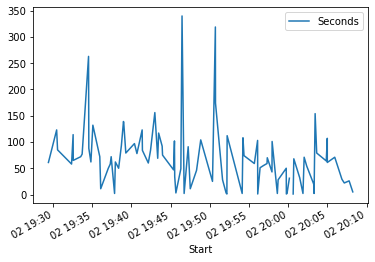

In [20]:
# Plot the duration of the steps depending on the time
data_proc.plot(x='Start',y='Seconds')

Even though the data itself seems to be roughly correct, there seem to be some factors that lead to significant longer durations over time. Let's see if we can find them? 

Text(0, 0.5, 'Duration [Sec]')

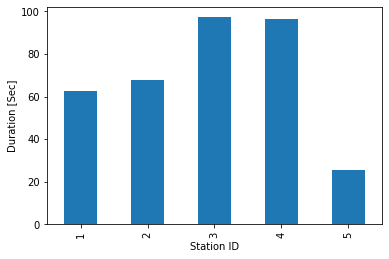

In [21]:
# Plot the mean value of the processing time based on work station
sec_plot = data_proc.groupby(['Workstation'])['Seconds'].mean().plot.bar()
sec_plot.set_xlabel("Station ID")
sec_plot.set_ylabel("Duration [Sec]")

Text(0, 0.5, 'Sum of Processtimes [Sec]')

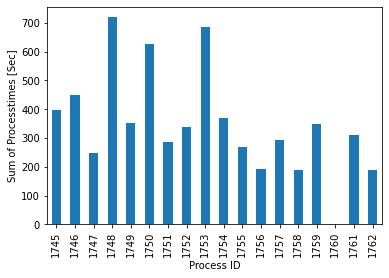

In [22]:
# Plot the sum of the processtimes based on the Process IDs
id_plot = data_proc.groupby(['ProcessID'])['Seconds'].sum().plot.bar()
id_plot.set_xlabel("Process ID")
id_plot.set_ylabel("Sum of Processtimes [Sec]")

It seems, that some processes take in sum longer than others. We need additional data to find out what makes those processes special.

## Phase 3: Data Preparation and Transformation / Feature engineering

---


Cleaning up data is part of nearly every machine learning project. It takes up a lot of time and is a necessity for a good model.

**Select data:** Determine which data sets will be used and document reasons for inclusion/exclusion.

**Clean data:** Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.

**Construct data:** Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.

**Integrate data:** Create new data sets by combining data from multiple sources.

**Format data:** Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

Using the data from the list of production orders, can you match the ProcessID with a variant? For now we only need the Type of the product, all other inforamtion can be discarded. 

In [23]:
col = ['RoundId','Type','Start','End','??','BoxId']
data_prod = pd.read_csv('/content/produktionsauftrag.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')

# here comes some domain knowledge, the Primary Key of the produktionorder table is the ProcessID which is incremented when ever a new order is generated.

data_prod = data_prod.loc[data_prod['RoundId'] == 216]
data_prod = data_prod.dropna()
data_prod = data_prod.drop(columns=['??','Start','End','BoxId','RoundId'])

data_prod.index.name = 'ProcessID'
data_prod

,Type
ProcessID,
1745,6
1746,6
1747,7
1748,8
1749,6
1750,6
1751,7
1752,6
1753,6


Just a quick reminder, how the data from before looked. We want to add the product type to the Process ID. 

In [24]:
data_proc

,ProcessID,RoundId,Workstation,Start,End,Seconds
4125,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27,61.0
4126,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32,123.0
4127,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01,85.0
4128,1747,216,1,2022-09-02 19:32:23,2022-09-02 19:33:21,58.0
4129,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29,114.0
...,...,...,...,...,...,...
4217,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07,71.0
4218,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20,29.0
4219,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31,22.0
4220,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12,26.0


We do this by merging the two data frames, based on the left (data_proc) table's Process ID.

In [25]:
result = pd.merge(data_proc, data_prod, how="left", on=['ProcessID'])
result

,ProcessID,RoundId,Workstation,Start,End,Seconds,Type
0,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27,61.0,6.0
1,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32,123.0,6.0
2,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01,85.0,6.0
3,1747,216,1,2022-09-02 19:32:23,2022-09-02 19:33:21,58.0,7.0
4,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29,114.0,6.0
...,...,...,...,...,...,...,...
85,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07,71.0,6.0
86,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20,29.0,7.0
87,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31,22.0,6.0
88,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12,26.0,6.0


Next step is to group the data based on the type of product and the workstation used. Can you make a statement regarding the different prouct types?

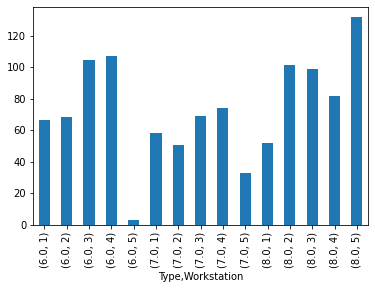

In [26]:
# Plot the mean value of the processing time based on work station
res_plot = result.groupby(['Type','Workstation'])['Seconds'].mean().plot.bar()

Based on the plot above it can be seen, that depending on the combination of type and workstation large deviation in regards to the processtime can be expected. 

In the same way we could add more elelemts to the table, such as production order start or end. 




## End of Lab 1
We now have gained an understanding of our data and prepared our data ...

Please download the file after generation for further processing

In [27]:
result.to_csv('output.csv')